In [1]:
from google.colab import drive
drive.mount('/content/path')

Mounted at /content/path


In [2]:
path=('/content/path/MyDrive/csv files/Churn_Modelling.csv')


In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv(path)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [10]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [11]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [12]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [13]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True).astype(int)

In [29]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [14]:
x=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model=Sequential()


In [56]:
model.add(Dense(32,activation='softmax',input_dim=11))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.add(Dense(1,activation='sigmoid'))

In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 12)                  │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 12)                  │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 5,469 (21.37 KB)

 Trainable params: 2,335 (9.12 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,134 (12.25 KB)

In [59]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [60]:
history=model.fit(x_train_sc,y_train,epochs=3)

Epoch 1/3
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7979 - loss: 0.6176
Epoch 2/3
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7887 - loss: 0.5163
Epoch 3/3
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7953 - loss: 0.5072


In [61]:
model.layers[0].get_weights()

[array([[-2.28498533e-01,  1.36253849e-01, -2.25584894e-01,
          2.72718351e-02,  1.09269068e-01,  5.93643188e-02,
          4.76573640e-03, -1.09383026e-02, -4.45424139e-01,
          3.92686784e-01],
        [ 1.37549877e-01,  1.64058328e-01,  2.52615154e-01,
         -8.35238099e-01, -1.82766140e-01, -8.76515627e-01,
          8.59612599e-02,  2.14212593e-02, -3.69224221e-01,
          7.96666622e-01],
        [-5.93515694e-01,  2.91188270e-01,  9.58626047e-02,
          3.22123058e-03, -1.19833119e-01, -2.18560174e-02,
          1.89555753e-02, -1.49984837e-01, -5.73235713e-02,
         -6.42713904e-01],
        [ 1.23949453e-01,  3.55574816e-01,  8.19653645e-02,
         -2.20890358e-01, -9.12344038e-01, -1.91261917e-01,
         -7.71895587e-01,  6.00915372e-01,  4.59421188e-01,
         -6.79137707e-01],
        [-4.57300425e-01, -9.88350689e-01,  5.56687936e-02,
          9.64801386e-02, -1.18762004e+00,  1.54234618e-01,
          1.23046088e+00,  9.76813853e-01,  5.158470

In [62]:
model.layers[2].get_weights()

[array([[ 0.4378303 , -0.21849318,  0.32778844,  0.54659855,  0.3846864 ,
          0.2627516 ,  0.15782572, -0.81363904],
        [ 0.2004827 ,  0.09296793,  0.04848873,  0.3699189 , -0.708007  ,
         -0.4940665 ,  0.8165308 ,  0.32991955],
        [-0.47049746,  0.15533091, -0.5656678 ,  1.148481  , -0.534646  ,
         -0.7732659 ,  0.894602  , -0.5691909 ],
        [ 0.94587755,  0.824639  ,  0.25396284, -1.1736745 ,  1.7297964 ,
          0.9359107 , -0.44905   ,  1.091109  ],
        [ 0.78517824, -0.03468685,  0.7093245 ,  0.36892128,  0.48308966,
          0.41764396, -1.3732454 ,  0.2707694 ],
        [ 0.31074825, -0.24313557,  0.69783497, -0.5235727 ,  0.25816584,
          0.59318566,  0.56559235, -0.1078568 ],
        [ 0.5408141 ,  0.36364344,  0.2536945 , -0.77564305, -0.46146744,
          0.71869   , -0.02410862,  0.03752423],
        [-0.89305246, -0.7307961 , -0.92147577,  0.43921983,  0.02865691,
         -0.41187873,  1.2322779 , -0.770228  ],
        [-0.0407

In [63]:
y_log=model.predict(x_test_sc)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [64]:
y_pred=np.where(y_log>0.5,1,0)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8053333333333333

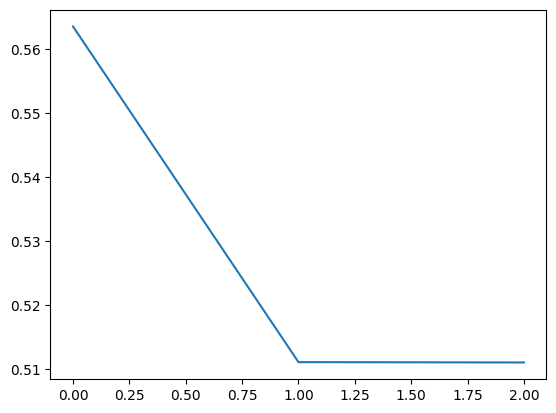

In [66]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
